In [11]:
#Exploratory Data Analysis (EDA)

# --- 1. Setup ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load dataset
df = pd.read_csv('../data/transformed/Final/cleaned_finance_dataset.csv')  # adjust path if needed
df.head()


,Date,Company,Stock_Price,Revenue_Millions,Net_Income_Millions,Market_Cap_Billions,EPS,Profit_Margin,Revenue_Growth
0,2022-01-01,EnergyCo,65.3,700.60,90.15,32.65,1.50,12.867542,0.000000
1,2022-02-01,EnergyCo,66.1,710.25,92.30,33.05,1.52,12.995424,1.377391
2,2022-03-01,EnergyCo,65.8,705.50,91.10,32.90,1.51,12.912828,-0.668779
3,2022-04-01,EnergyCo,66.5,715.75,93.25,33.25,1.53,13.028292,1.452870
4,2022-05-01,EnergyCo,67.0,720.90,94.50,33.50,1.55,13.108614,0.719525


In [5]:
# --- 2. Dataset Summary ---
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 199 non-null    object 
 1   Company              199 non-null    object 
 2   Stock_Price          199 non-null    float64
 3   Revenue_Millions     199 non-null    float64
 4   Net_Income_Millions  199 non-null    float64
 5   Market_Cap_Billions  199 non-null    float64
 6   EPS                  199 non-null    float64
 7   Profit_Margin        199 non-null    float64
 8   Revenue_Growth       199 non-null    float64
dtypes: float64(7), object(2)
memory usage: 14.1+ KB


Date                   0
Company                0
Stock_Price            0
Revenue_Millions       0
Net_Income_Millions    0
Market_Cap_Billions    0
EPS                    0
Profit_Margin          0
Revenue_Growth         0
dtype: int64

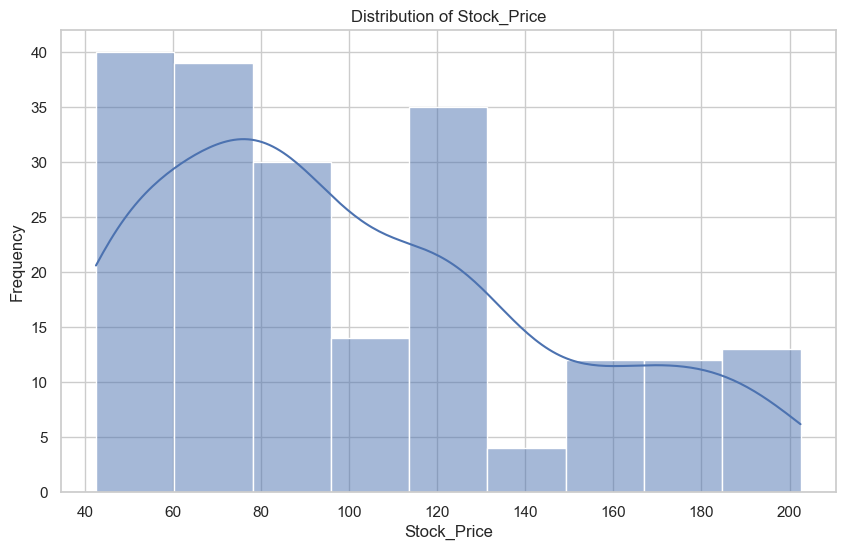

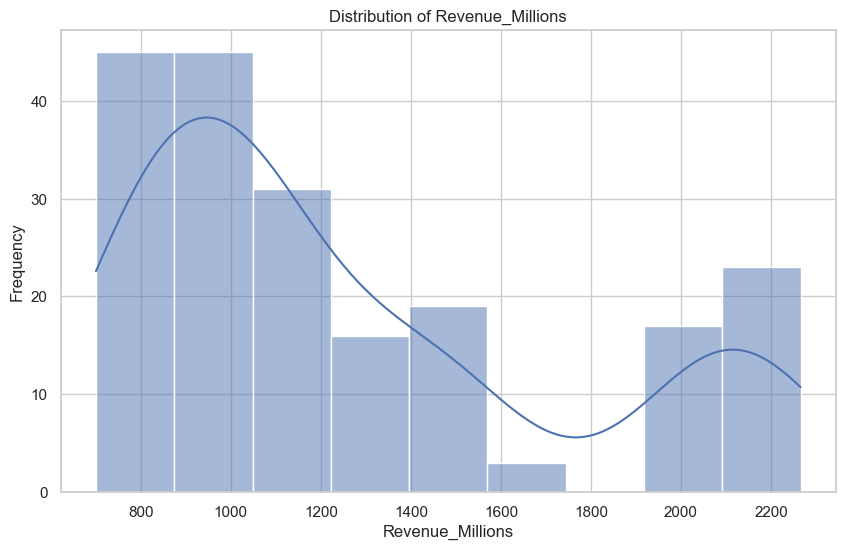

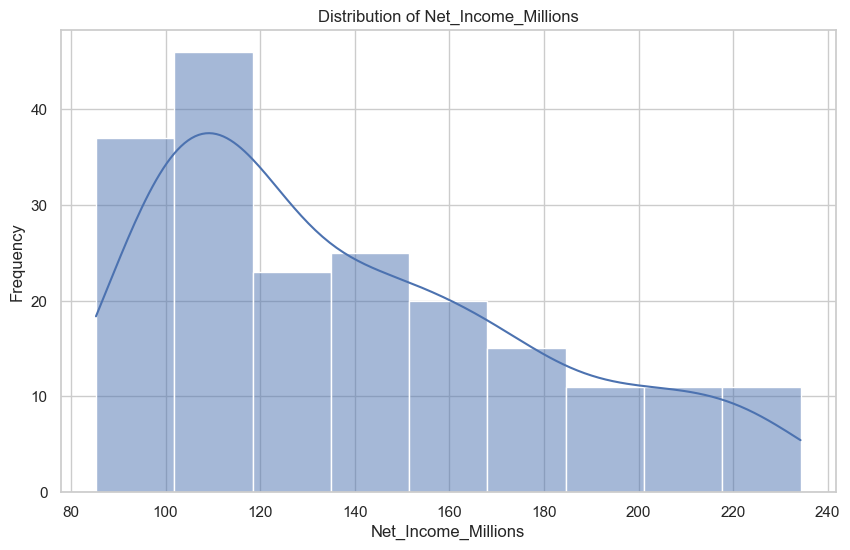

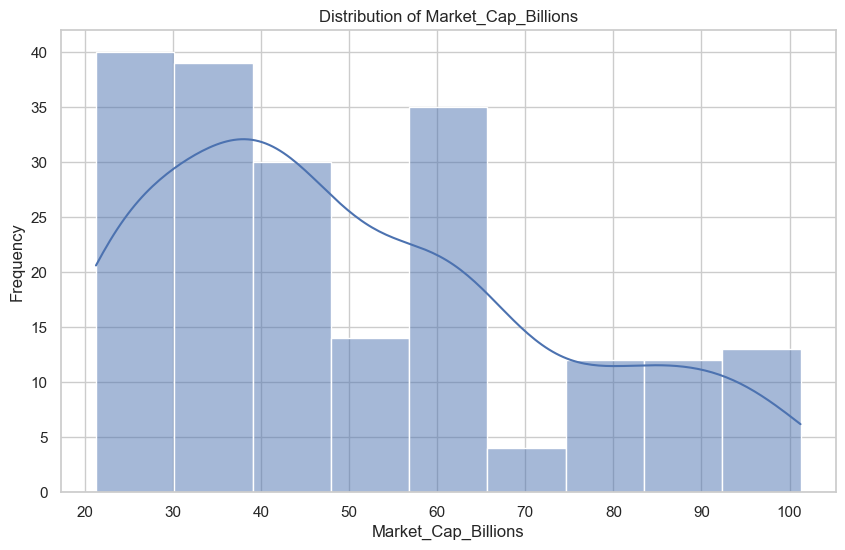

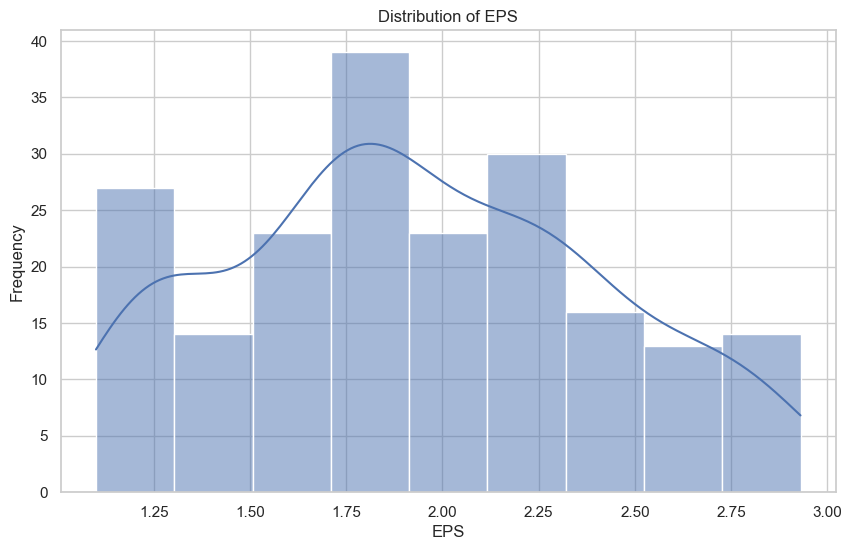

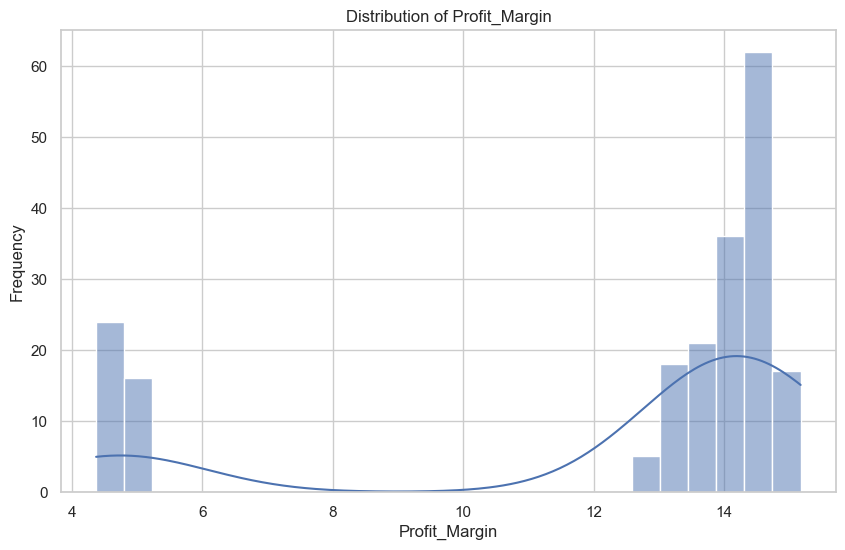

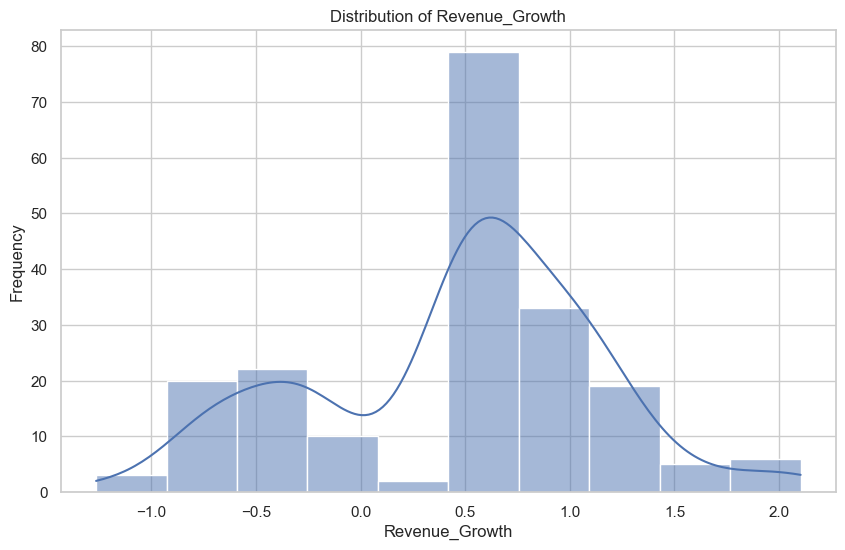

In [6]:
# --- 3. Univariate Analysis: Distributions ---
# For numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


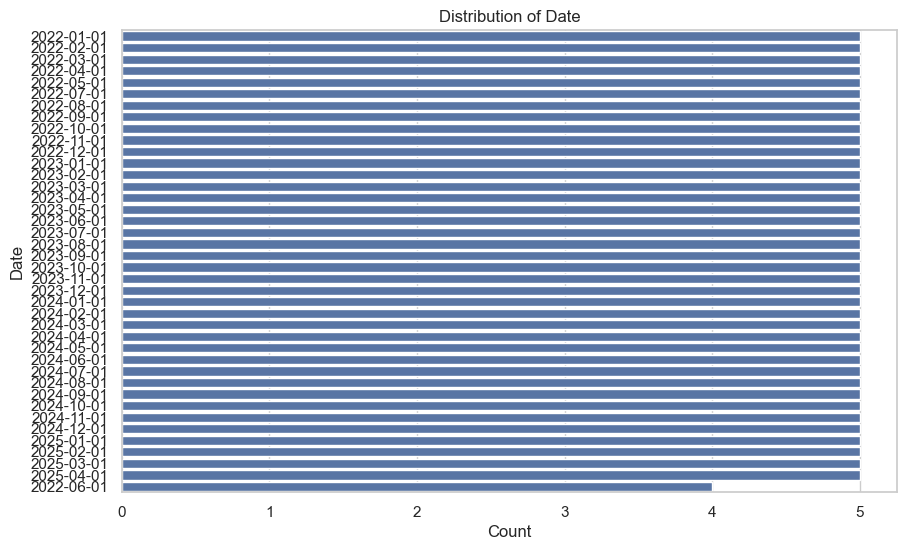

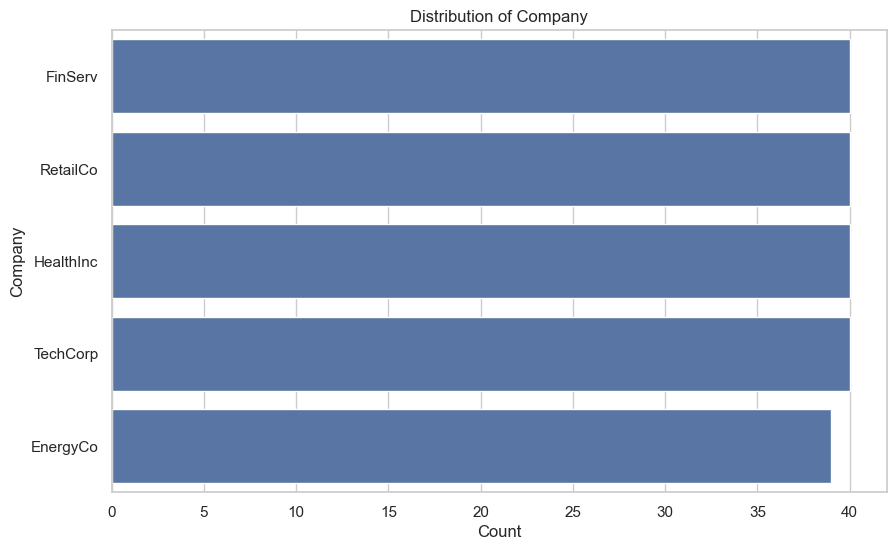

In [7]:
# --- 4. Categorical Variables ---
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()


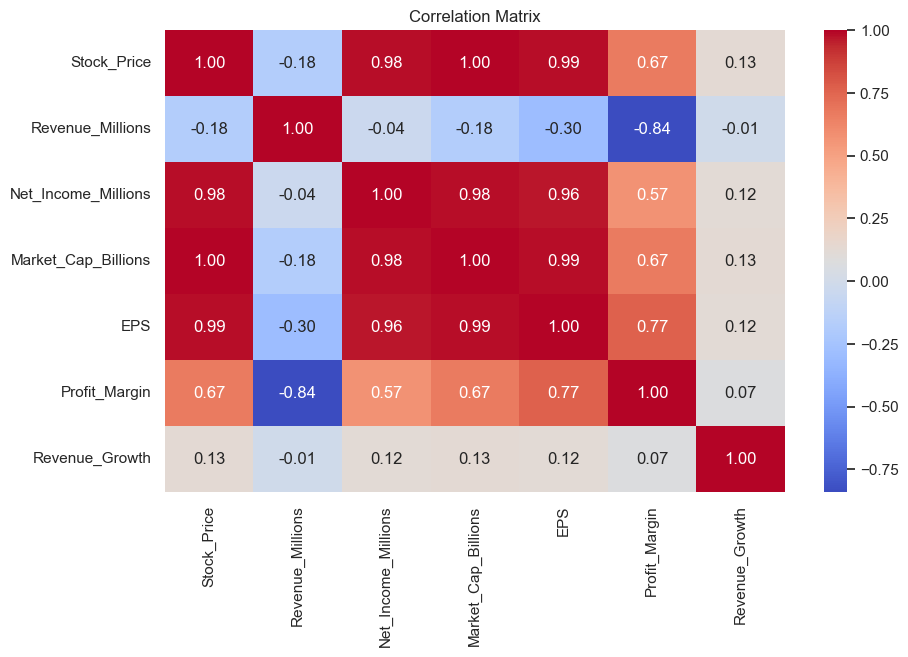

In [8]:
# --- 5. Correlation Matrix ---
# Only for numeric columns
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [12]:
# --- 6. Group Comparisons ---
# Replace with your actual column names

# Example 1: Compare mean sales across customer segments
if 'customer_segment' in df.columns and 'purchase_amount' in df.columns:
    sns.boxplot(x='customer_segment', y='purchase_amount', data=df)
    plt.title('Purchase Amount by Customer Segment')
    plt.xticks(rotation=45)
    plt.show()

# Example 2: Compare average values by region
if 'region' in df.columns and 'purchase_amount' in df.columns:
    df.groupby('region')['purchase_amount'].mean().plot(kind='bar')
    plt.title('Average Purchase Amount by Region')
    plt.ylabel('Mean Purchase Amount')
    plt.show()


In [13]:
# --- 7. Statistical Test (Optional) ---
# T-test: compare two groups (if applicable)

from scipy.stats import ttest_ind

# Example: comparing two regions
if 'region' in df.columns and 'purchase_amount' in df.columns:
    group1 = df[df['region'] == 'North']['purchase_amount']
    group2 = df[df['region'] == 'South']['purchase_amount']

    t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
    print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")
